In [154]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
bc=pd.read_csv("D:/python3/data_science & ML/IBM ML/classification/data.csv")
bc
bc=bc.dropna(axis=1)
bc=bc.drop(columns='id')
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [18]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [88]:
X=bc.drop(columns='diagnosis')
y=bc.diagnosis
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
mms=MinMaxScaler()
x_train_scale=mms.fit_transform(x_train)
x_test_scale=mms.transform(x_test)
x_train_scale=pd.DataFrame(x_train_scale,index=x_train.index,columns=x_train.columns)
x_test_scale=pd.DataFrame(x_test_scale,index=x_test.index,columns=x_test.columns)
y_train

293    B
332    B
565    M
278    B
489    M
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 426, dtype: object

In [89]:
def cate_encode(string):
    if string=='B':
        return 0
    if string=='M':
        return 1
y_train=y_train.apply(cate_encode).to_frame()
y_test=y_test.apply(cate_encode).to_frame()

In [96]:
train_set=y_train.join(x_train_scale)
train_set
test_set=y_test.join(x_test_scale)
test_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,1,0.303800,0.448548,0.309930,0.175270,0.629630,0.436682,0.338566,0.406163,0.533333,...,0.301672,0.470149,0.313213,0.162013,0.569438,0.347634,0.407827,0.706511,0.398186,0.366391
457,0,0.294808,0.644813,0.278557,0.167296,0.383187,0.111876,0.064948,0.102783,0.282323,...,0.228388,0.591951,0.203596,0.110032,0.381232,0.076656,0.111022,0.206855,0.173270,0.084219
439,0,0.333144,0.246888,0.316495,0.196394,0.293581,0.124752,0.048899,0.131809,0.267172,...,0.248310,0.194296,0.229693,0.123796,0.212838,0.072193,0.050000,0.283018,0.112557,0.079103
298,0,0.344503,0.351037,0.327759,0.207678,0.142609,0.112390,0.057990,0.068290,0.290404,...,0.294913,0.352878,0.275860,0.155943,0.153734,0.183767,0.125000,0.259387,0.211118,0.142464
37,0,0.286289,0.361411,0.268261,0.161315,0.404040,0.062598,0.060028,0.145278,0.205556,...,0.191035,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172683,0.083185,0.043618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,0.768091,0.716183,0.758137,0.647508,0.461171,0.509623,0.456888,0.614811,0.428788,...,0.821060,0.599414,0.774889,0.678038,0.508024,0.373830,0.464856,0.893214,0.303174,0.208120
113,0,0.167022,0.434855,0.171723,0.080891,0.647008,0.379837,0.151734,0.152485,0.435354,...,0.114906,0.285981,0.110613,0.046500,0.388496,0.172318,0.103435,0.211368,0.161246,0.231011
527,0,0.253632,0.106224,0.242900,0.137858,0.406213,0.149613,0.069306,0.131561,0.317677,...,0.202063,0.193230,0.183326,0.093320,0.383213,0.174744,0.143051,0.368584,0.304554,0.136954
76,0,0.309953,0.051037,0.304886,0.176331,0.830564,0.292172,0.161129,0.325845,0.678283,...,0.218783,0.012527,0.203944,0.103298,0.488212,0.107314,0.068203,0.255150,0.225705,0.110652


In [118]:
#K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [138]:
scores=pd.DataFrame(index=[i for i in range(0,8)],columns=['number of neighbors','accuracy score'])
for i in range(3,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scale,y_train)
    y_hat=knn.predict(x_test_scale)
    scores.loc[i-3,'number of neighbors']=i
    scores.loc[i-3,'accuracy score']=accuracy_score(y_test,y_hat)
scores
px.line(scores,x='number of neighbors',y='accuracy score')

# print(classification_report(y_test,y_hat))

In [164]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scale,y_train)
y_hat=knn.predict(x_test_scale)
y_prob=knn.predict_proba(x_test_scale)[:,-1]
params=knn.get_params()
params
pd.DataFrame(params,index=['params'])
# print(classification_report(y_test,y_hat))

,algorithm,leaf_size,metric,metric_params,n_jobs,n_neighbors,p,weights
params,auto,30,minkowski,None,None,5,2,uniform


In [151]:
from sklearn.metrics import roc_auc_score, roc_curve
knn_roc_auc=roc_auc_score(y_test,y_prob)
knn_roc_auc

0.9820754716981132

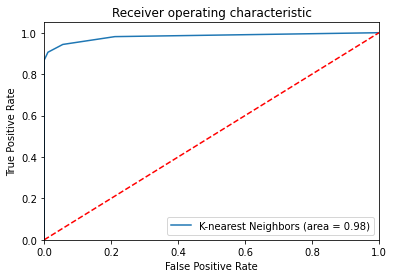

In [156]:
tpr,fpr,thresholds=roc_curve(y_test,y_prob)
plt.figure()
plt.plot(tpr, fpr, label='K-nearest Neighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [175]:
#logistic regression
from sklearn.linear_model import LogisticRegression
c=[0.01,0.05,0.1,0.5,1]
penalty=['l2']
scores=pd.DataFrame(index=c,columns=['l2'])
scores=scores.rename_axis('C')
scores

,l2
C,
0.01,NaN
0.05,NaN
0.10,NaN
0.50,NaN
1.00,NaN


In [192]:
lr=LogisticRegression(penalty='l2',C=1,random_state=0)
lr.fit(x_train_scale,y_train)
yhat=lr.predict(x_test_scale)
y_prob=lr.predict_proba(x_test_scale)[:,1]
print(classification_report(y_test,y_hat))
pd.DataFrame(lr.coef_,index=['coef'],columns=x_train_scale.columns)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
coef,1.696308,1.64476,1.671853,1.43111,0.81555,0.559148,1.227744,1.954875,0.800619,-0.774711,...,2.14918,1.838836,1.992571,1.54616,1.240442,0.860804,1.227979,2.557974,1.253041,0.385368


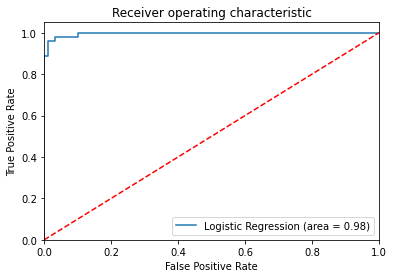

In [179]:
tpr,fpr,thresholds=roc_curve(y_test,y_prob)
plt.figure()
plt.plot(tpr, fpr, label='Logistic Regression (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [181]:
#SVM
from sklearn.svm import SVC
c=[0.01,0.05,0.1,0.5,1]
degrees=[1,2,3]
scores=pd.DataFrame(index=c,columns=degrees)
for i in c:
    for j in degrees:
        svc=SVC(C=i,degree=j)
        svc.fit(x_train_scale,y_train)
        y_hat=svc.predict(x_test_scale)
        scores.loc[i,j]=accuracy_score(y_test,y_hat)
scores

,1,2,3
0.01,0.636364,0.636364,0.636364
0.05,0.958042,0.958042,0.958042
0.10,0.958042,0.958042,0.958042
0.50,0.979021,0.979021,0.979021
1.00,0.972028,0.972028,0.972028


In [183]:
svc=SVC(C=0.5)
svc.fit(x_train_scale,y_train)
y_hat=svc.predict(x_test_scale)

print(classification_report(y_test,y_hat))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [193]:
pd.DataFrame(svc.get_params(),index=['params'])

,C,break_ties,cache_size,class_weight,coef0,decision_function_shape,degree,gamma,kernel,max_iter,probability,random_state,shrinking,tol,verbose
params,0.5,False,200,None,0.0,ovr,3,scale,rbf,-1,False,None,True,0.001,False
